In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def plot_grouped_bars(ax, xlabels, ys, legend_names=[], xlabel=None, ylabel=None, title=None, hide_xticks=False):
    num_bars_in_group = len(ys)
    gap_between_bargroups = 0.35  # where 1.0 means the distance between the first bar of a group to the first of the next
    gap_between_bars_in_group = 0.01
    
    bar_width = ((1.0 - gap_between_bargroups) + gap_between_bars_in_group) / num_bars_in_group
    
    #colors = ['b', 'g', 'r', 'y', 'gray']
    colors = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0'] * 5  # TODO: more colors
    # assert len(ys) <= len(colors)
    X = np.array(range(len(xlabels)))
    # print("X_", X)
    
    for i, (y, c) in enumerate(zip(ys, colors)):
        ax.bar(X + i*bar_width, y, color=c, width=bar_width - gap_between_bars_in_group, align='center')
    if not hide_xticks:
        # xpos = [r + bar_width * (num_bars_in_group - 1) / len(X) for r in range(len(X))]
        # print("bar_width", bar_width)
        group_width = num_bars_in_group * bar_width # + (num_bars_in_group - 1) * gap_between_bars_in_group
        # print("group_width", group_width)
        xpos = X + (bar_width * (num_bars_in_group - 1))/2
        # xpos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]
        # print("xpos", xpos)
        plt.xticks(xpos, xlabels)
        # plt.xticks(xpos)
        
        group_width *= 1.1
        min_x = min(xpos) - (group_width / 2)
        max_x = max(xpos) + (group_width / 2)
        # ax.set_xlim(min_x, max_x)
    if legend_names:
        ax.legend(legend_names)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    # return ax
    # plt.show()

In [4]:
experiments_csv = "~/all_experiments_new3.csv"
experiments_df = pd.read_csv(experiments_csv)
import ast
experiments_df["cfg"] = experiments_df["cfg"].apply(ast.literal_eval)
experiments_df["cfg_str"] = experiments_df["cfg"].apply(lambda x: str(dict(sorted(x.items()))))

# TODO: generate
experiments_df["rel_run_instrs_reduction"] = -experiments_df["rel_run_instrs"] + 1
experiments_df["rel_run_code_reduction"] = -experiments_df["rel_run_code"] + 1

experiments_df

,benchmark,datetime,experiment,cfg,comment,status,missing,time_bench_0,time_isaac_0_analyze,time_isaac_0_load,...,time_syn_0_filtered2_selected,time_assign_0_compare,time_assign_0_compare_others,time_assign_0_hls,time_assign_0_syn,time_assign_0_util,time_isaac_0_etiss_filtered,cfg_str,rel_run_instrs_reduction,rel_run_code_reduction
0,example/load_filter,20250325T113340,isaac-demo-example/load_filter-20250325T113340,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;ise_util.pkl...,3.225,11.677,3.471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",NaN,NaN
1,example/basic_hash,20250325T121318,isaac-demo-example/basic_hash-20250325T121318,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;total_encodi...,3.114,10.400,2.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",NaN,NaN
2,embench/nettle-aes,20250409T223925,isaac-demo-embench/nettle-aes-20250409T223925,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,3.456,109.692,29.760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.335043,0.050825
3,embench/nettle-aes,20250404T105828,isaac-demo-embench/nettle-aes-20250404T105828,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,ise_util.pkl;total_encoding_metrics_final.csv;...,3.435,109.124,29.634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",NaN,NaN
4,embench/nettle-aes,20250411T013125,isaac-demo-embench/nettle-aes-20250411T013125,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;hls_selected...,3.335,121.430,29.738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.336088,0.048185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,embench/matmult-int,20250415T211742,isaac-demo-embench/matmult-int-20250415T211742,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,8.338,103.072,24.125,...,0.014,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.127820,0.004723
143,embench/matmult-int,20250411T005253,isaac-demo-embench/matmult-int-20250411T005253,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;hls_selected...,3.655,74.774,24.380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.128139,0.004723
144,embench/matmult-int,20250408T213834,isaac-demo-embench/matmult-int-20250408T213834,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,3.256,74.191,24.545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.128139,0.004723
145,embench/matmult-int,20250406T133112,isaac-demo-embench/matmult-int-20250406T133112,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,empty,ise_util.pkl;final_index.yml;hls_selected_sche...,3.848,74.141,24.545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",NaN,NaN


In [5]:
# experiments_df[(experiments_df["benchmark"] == "embench/nettle-sha256") & (experiments_df["hls_default_estimated_area_isax_only"] > 0)][["experiment", "cfg", "hls_default_estimated_area_isax_only"]]

In [6]:
# EXPs = ["isaac-demo-embench/md5sum-20250326T131843", "isaac-demo-embench/crc32-20250326T141711"]

EXPs = list(experiments_df[~pd.isna(experiments_df["time_reanalyze_0_final"])]["experiment"])
# EXPs = list(experiments_df[(experiments_df["hls_default_estimated_area_isax_only"] > 0)]["experiment"])
EXPs, len(EXPs)

(['isaac-demo-embench/nettle-aes-20250409T223925',
  'isaac-demo-embench/nettle-aes-20250411T013125',
  'isaac-demo-embench/nettle-aes-20250409T124431',
  'isaac-demo-embench/nettle-aes-20250409T073812',
  'isaac-demo-embench/nettle-aes-20250415T220619',
  'isaac-demo-embench/md5sum-20250408T211018',
  'isaac-demo-embench/md5sum-20250408T223228',
  'isaac-demo-embench/md5sum-20250408T215658',
  'isaac-demo-embench/md5sum-20250415T214340',
  'isaac-demo-embench/md5sum-20250411T011136',
  'isaac-demo-embench/st-20250411T032356',
  'isaac-demo-embench/st-20250416T091334',
  'isaac-demo-embench/st-20250410T010936',
  'isaac-demo-embench/st-20250409T103848',
  'isaac-demo-embench/st-20250409T160905',
  'isaac-demo-embench/edn-20250410T233358',
  'isaac-demo-embench/edn-20250415T203147',
  'isaac-demo-embench/edn-20250408T185904',
  'isaac-demo-embench/edn-20250408T170156',
  'isaac-demo-embench/edn-20250408T180526',
  'isaac-demo-embench/nettle-sha256-20250409T230854',
  'isaac-demo-embench

In [7]:
filtered_df = experiments_df[experiments_df["experiment"].isin(EXPs)].reset_index(drop=True)
# filtered_df["ise"] = filtered_df.index.map(lambda x: f"ISE {x}")
# ise_map = 
# filtered_df["config"] = "Config 0"

ISEs = list(filtered_df["benchmark"].unique())
ise_map = {f"ISE {i} ({benchmark})": benchmark for i, benchmark in enumerate(ISEs)}

# filtered_df["cfg_str_datetime"] = filtered_df["cfg_str"] + " || " + filtered_df["datetime"]
# CFGs = list(filtered_df.groupby(["cfg_str", "datetime"]).groups.keys())
CFGs = list(sorted(filtered_df["cfg_str"].unique()))
# print("a", CFGs)
# config_map = {f"Config {i} ({cfg_datetime[1]})": cfg_datetime for i, cfg_datetime in enumerate(CFGs)}
config_map = {f"Config {i}": cfg for i, cfg in enumerate(CFGs)}

# filtered_df["config"] = filtered_df[["cfg_str", "datetime"]].apply(lambda x: list(config_map.keys())[CFGs.index((x[0], x[1]))], axis=1) # list(config_map.keys())[CFGs.index((x["cfg_str"], x["datetime"]))])
filtered_df["config"] = filtered_df["cfg_str"].apply(lambda x: list(config_map.keys())[CFGs.index(x)])
filtered_df["ise"] = filtered_df["benchmark"].apply(lambda x: list(ise_map.keys())[ISEs.index(x)])

filtered_df

,benchmark,datetime,experiment,cfg,comment,status,missing,time_bench_0,time_isaac_0_analyze,time_isaac_0_load,...,time_assign_0_compare_others,time_assign_0_hls,time_assign_0_syn,time_assign_0_util,time_isaac_0_etiss_filtered,cfg_str,rel_run_instrs_reduction,rel_run_code_reduction,config,ise
0,embench/nettle-aes,20250409T223925,isaac-demo-embench/nettle-aes-20250409T223925,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,3.456,109.692,29.760,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.335043,0.050825,Config 0,ISE 0 (embench/nettle-aes)
1,embench/nettle-aes,20250411T013125,isaac-demo-embench/nettle-aes-20250411T013125,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;hls_selected...,3.335,121.430,29.738,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.336088,0.048185,Config 1,ISE 0 (embench/nettle-aes)
2,embench/nettle-aes,20250409T124431,isaac-demo-embench/nettle-aes-20250409T124431,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv,3.459,106.605,30.239,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264,Config 3,ISE 0 (embench/nettle-aes)
3,embench/nettle-aes,20250409T073812,isaac-demo-embench/nettle-aes-20250409T073812,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv,3.510,107.351,30.260,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.334956,0.048185,Config 2,ISE 0 (embench/nettle-aes)
4,embench/nettle-aes,20250415T220619,isaac-demo-embench/nettle-aes-20250415T220619,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,8.322,168.953,29.389,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.336088,0.048185,Config 1,ISE 0 (embench/nettle-aes)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,embench/wikisort,20250416T120022,isaac-demo-embench/wikisort-20250416T120022,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,10.118,54.826,5.454,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.038273,0.045758,Config 1,ISE 14 (embench/wikisort)
73,embench/matmult-int,20250408T202837,isaac-demo-embench/matmult-int-20250408T202837,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv,3.195,70.814,24.521,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.127820,0.004723,Config 2,ISE 15 (embench/matmult-int)
74,embench/matmult-int,20250415T211742,isaac-demo-embench/matmult-int-20250415T211742,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,8.338,103.072,24.125,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.127820,0.004723,Config 1,ISE 15 (embench/matmult-int)
75,embench/matmult-int,20250411T005253,isaac-demo-embench/matmult-int-20250411T005253,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;hls_selected...,3.655,74.774,24.380,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.128139,0.004723,Config 1,ISE 15 (embench/matmult-int)


In [8]:
filtered_df[["experiment", "config"]]

,experiment,config
0,isaac-demo-embench/nettle-aes-20250409T223925,Config 0
1,isaac-demo-embench/nettle-aes-20250411T013125,Config 1
2,isaac-demo-embench/nettle-aes-20250409T124431,Config 3
3,isaac-demo-embench/nettle-aes-20250409T073812,Config 2
4,isaac-demo-embench/nettle-aes-20250415T220619,Config 1
...,...,...
72,isaac-demo-embench/wikisort-20250416T120022,Config 1
73,isaac-demo-embench/matmult-int-20250408T202837,Config 2
74,isaac-demo-embench/matmult-int-20250415T211742,Config 1
75,isaac-demo-embench/matmult-int-20250411T005253,Config 1


In [9]:
list(filtered_df.columns)

['benchmark',
 'datetime',
 'experiment',
 'cfg',
 'comment',
 'status',
 'missing',
 'time_bench_0',
 'time_isaac_0_analyze',
 'time_isaac_0_load',
 'time_isaac_0_pick',
 'time_isaac_0_visualize',
 'time_trace_0',
 'time_total',
 'choices_count',
 'choices_sum_weights',
 'choices_sum_num_instrs',
 'choices_max_num_instrs',
 'choices_num_too_large_bbs',
 'choices_num_left',
 'time_compare_0',
 'time_compare_others_0',
 'time_etiss_0',
 'time_isaac_0_cdfg',
 'time_isaac_0_etiss',
 'time_isaac_0_query',
 'time_reanalyze_0',
 'time_retrace_0',
 'time_seal5_0',
 'query_num_rows_sum',
 'query_num_rows_max',
 'query_num_nodes_sum',
 'query_num_nodes_max',
 'query_num_edges_sum',
 'query_num_edges_max',
 'num_duplicate_candidates',
 'num_duplicate_candidates_rel',
 'num_total_candidates',
 'num_combined_candidates',
 'used_bbs_count',
 'used_bbs_weights_sum',
 'time_assign_0_compare_filtered',
 'time_assign_0_compare_others_filtered',
 'time_assign_0_compare_per_instr',
 'time_assign_0_enc',


In [10]:
# config_map    

In [11]:
# ise_map

In [12]:
# experiments_df.sort_values("datetime").groupby(["benchmark", "cfg_str"]).last()

In [13]:
all_keys = set(sum([list(ast.literal_eval(x).keys()) for x in config_map.values()], []))
common_keys = set(dict(set.intersection(*[set(ast.literal_eval(x).items()) for x in config_map.values()])).keys())
diff_keys = all_keys - common_keys
config_map_min = {name: {k: v for k, v in ast.literal_eval(cfg).items() if k in diff_keys} for name, cfg in config_map.items()}
config_map_min

{'Config 0': {'ASIP_SYN_ENABLE': '0',
  'ASIP_SYN_SKIP_BASELINE': '',
  'ASIP_SYN_SKIP_DEFAULT': '',
  'ASIP_SYN_SKIP_SHARED': '',
  'ASIP_SYN_SYNOPSYS_CLOCK_NS': '',
  'ASIP_SYN_SYNOPSYS_CORE_NAME': '',
  'ASIP_SYN_SYNOPSYS_PDK': '',
  'ASIP_SYN_TOOL': '',
  'FPGA_SYN_ENABLE': '0',
  'FPGA_SYN_SKIP_BASELINE': '',
  'FPGA_SYN_SKIP_DEFAULT': '',
  'FPGA_SYN_SKIP_SHARED': '',
  'FPGA_SYN_TOOL': '',
  'FPGA_SYN_VIVADO_CLOCK_NS': '',
  'FPGA_SYN_VIVADO_CORE_NAME': '',
  'FPGA_SYN_VIVADO_PART': '',
  'HLS_ENABLE': '0',
  'HLS_NAILGUN_CLOCK_NS': '',
  'HLS_NAILGUN_CORE_NAME': '',
  'HLS_NAILGUN_ILP_SOLVER': '',
  'HLS_NAILGUN_LIBRARY': '',
  'HLS_NAILGUN_OL2_CONFIG_TEMPLATE': '',
  'HLS_NAILGUN_OL2_ENABLE': '',
  'HLS_NAILGUN_OL2_TARGET_FREQ': '',
  'HLS_NAILGUN_OL2_TARGET_UTIL': '',
  'HLS_NAILGUN_OL2_UNTIL_STEP': '',
  'HLS_NAILGUN_REFINE_TIMEOUT': '',
  'HLS_NAILGUN_RESOURCE_MODEL': '',
  'HLS_NAILGUN_SCHEDULE_TIMEOUT': '',
  'HLS_NAILGUN_SCHED_ALGO_MI': '',
  'HLS_NAILGUN_SCHED_ALGO_MS':

In [14]:
df = filtered_df

In [15]:
# only keep newest experiment for benchmark+config
df = df.sort_values("datetime").groupby(["benchmark", "cfg_str"], as_index=False).last()

In [16]:
ISEs = df["ise"].unique()
CFGs = df["config"].unique()

full_index = pd.MultiIndex.from_product([ISEs, CFGs], names=['ise', 'config'])

df_full = df.set_index(['ise', 'config']).reindex(full_index)

df_full = df_full.reset_index()
df_full

,ise,config,benchmark,cfg_str,datetime,experiment,cfg,comment,status,missing,...,time_spec_0_filtered,time_syn_0_filtered2_selected,time_assign_0_compare,time_assign_0_compare_others,time_assign_0_hls,time_assign_0_syn,time_assign_0_util,time_isaac_0_etiss_filtered,rel_run_instrs_reduction,rel_run_code_reduction
0,ISE 9 (embench/aha-mont64),Config 0,embench/aha-mont64,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250408T164632,isaac-demo-embench/aha-mont64-20250408T164632,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115563,0.021100
1,ISE 9 (embench/aha-mont64),Config 1,embench/aha-mont64,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250415T193231,isaac-demo-embench/aha-mont64-20250415T193231,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv;hls_selected...,...,0.282,0.011,NaN,NaN,NaN,NaN,NaN,NaN,0.115563,0.021100
2,ISE 9 (embench/aha-mont64),Config 2,embench/aha-mont64,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250408T154152,isaac-demo-embench/aha-mont64-20250408T154152,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,ok,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086503,0.015072
3,ISE 9 (embench/aha-mont64),Config 3,embench/aha-mont64,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250408T162231,isaac-demo-embench/aha-mont64-20250408T162231,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086503,0.015072
4,ISE 5 (embench/crc32),Config 0,embench/crc32,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250408T183228,isaac-demo-embench/crc32-20250408T183228,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,metrics.csv;hls_selected_schedule_metrics.csv;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260765,0.007634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ISE 12 (embench/ud),Config 3,embench/ud,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250409T193629,isaac-demo-embench/ud-20250409T193629,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045746,0.010056
60,ISE 14 (embench/wikisort),Config 0,embench/wikisort,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250410T014753,isaac-demo-embench/wikisort-20250410T014753,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016995,0.000000
61,ISE 14 (embench/wikisort),Config 1,embench/wikisort,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250416T120022,isaac-demo-embench/wikisort-20250416T120022,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,...,0.376,0.016,NaN,NaN,NaN,NaN,NaN,NaN,0.038273,0.045758
62,ISE 14 (embench/wikisort),Config 2,embench/wikisort,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",20250409T120857,isaac-demo-embench/wikisort-20250409T120857,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",None,incomplete,hls_selected_schedule_metrics.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024569,0.026692


In [17]:
df_full[["experiment", "config"]]

,experiment,config
0,isaac-demo-embench/aha-mont64-20250408T164632,Config 0
1,isaac-demo-embench/aha-mont64-20250415T193231,Config 1
2,isaac-demo-embench/aha-mont64-20250408T154152,Config 2
3,isaac-demo-embench/aha-mont64-20250408T162231,Config 3
4,isaac-demo-embench/crc32-20250408T183228,Config 0
...,...,...
59,isaac-demo-embench/ud-20250409T193629,Config 3
60,isaac-demo-embench/wikisort-20250410T014753,Config 0
61,isaac-demo-embench/wikisort-20250416T120022,Config 1
62,isaac-demo-embench/wikisort-20250409T120857,Config 2


In [18]:
# list(filtered_df[filtered_df["benchmark"] == "embench/nettle-sha256"].columns)  # [["config", "rel_run_instrs_reduction"]]

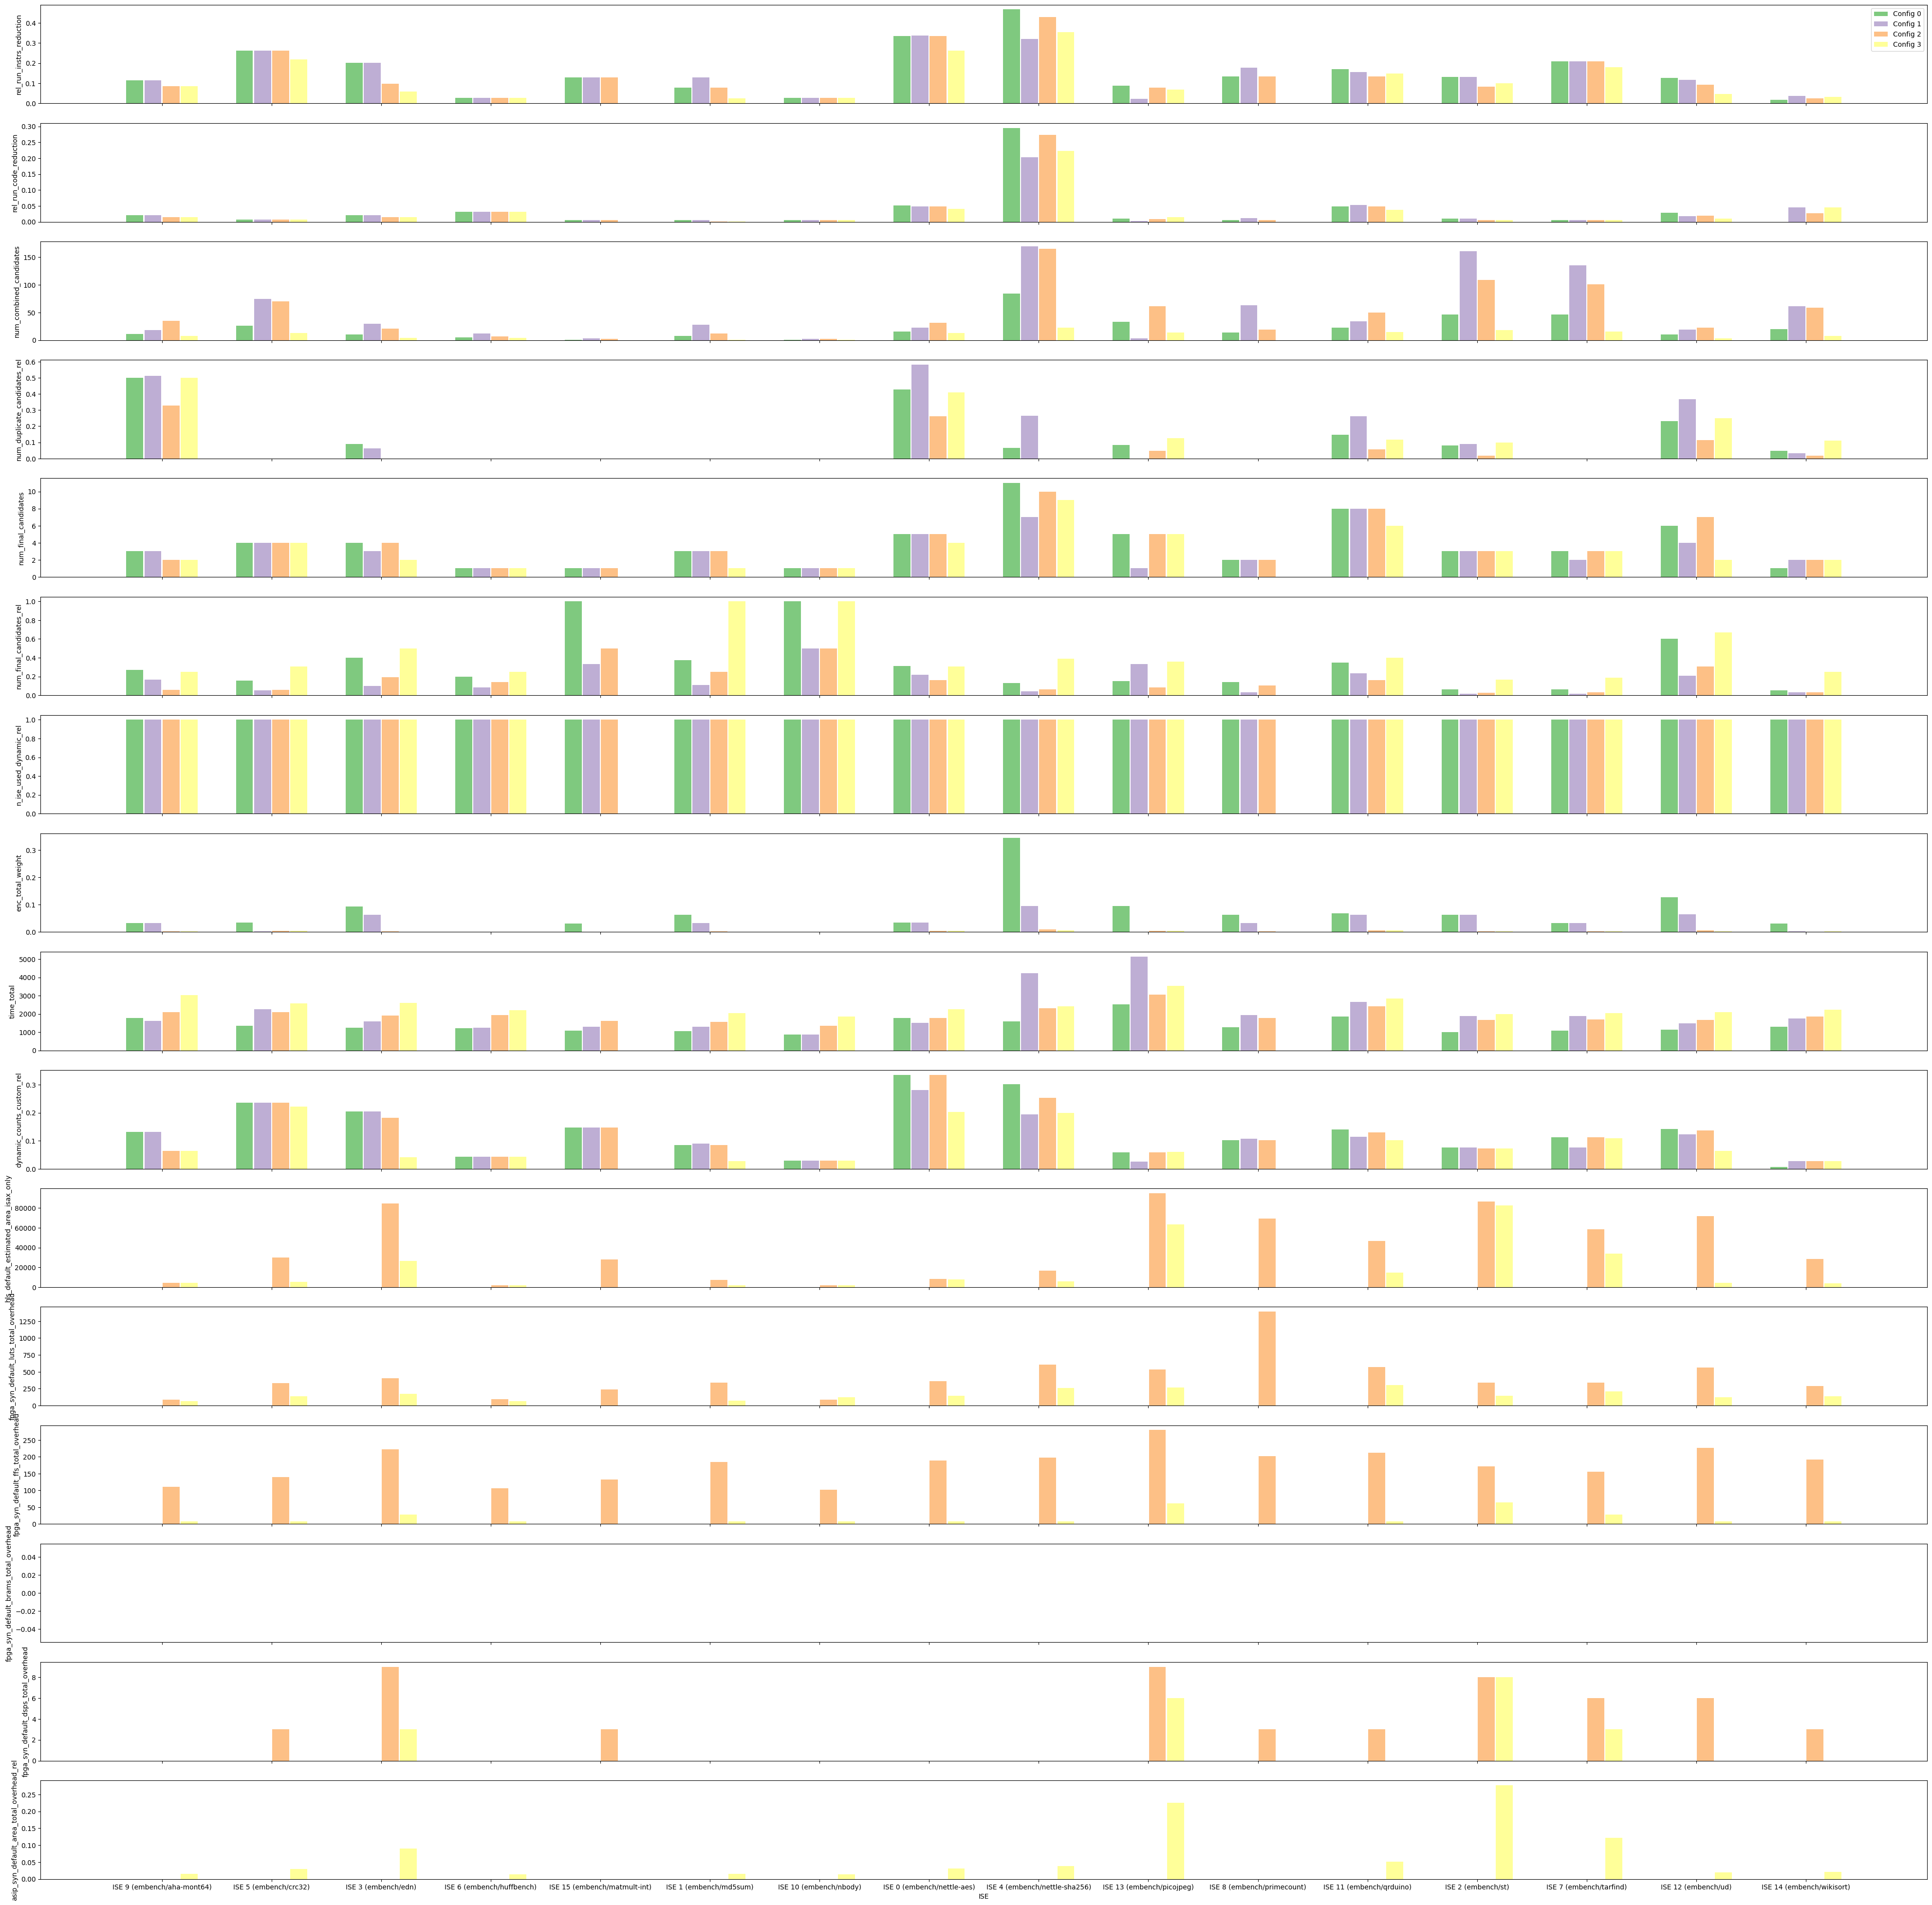

In [19]:
WIDTH, HEIGHT = (50, 50)

PRE = ["ise", "config"]
METRICS = [
    "rel_run_instrs_reduction", "rel_run_code_reduction",
    # "num_dropped_candidates",
    # "num_filtered_candidates_rel", "num_prelim_candidates",
    # "num_dropped_candidates_rel", "num_final_candidates",
    # "num_total_candidates",
    "num_combined_candidates", "num_duplicate_candidates_rel", "num_final_candidates", "num_final_candidates_rel",
    # "prelim_n_ise_instrs", "prelim_n_ise_used_dynamic_rel",
    # "n_ise_instrs",
    "n_ise_used_dynamic_rel",
    "enc_total_weight",
    "time_total",
    # "compare_others_num_isax_progs_good_rel", "compare_others_total_speedup",
    "dynamic_counts_custom_rel", 
    "hls_default_estimated_area_isax_only",
    # "hls_shared_estimated_area_isax_only", "hls_estimated_sharing_factor_isax_only",
    "fpga_syn_default_luts_total_overhead", "fpga_syn_default_ffs_total_overhead", "fpga_syn_default_brams_total_overhead", "fpga_syn_default_dsps_total_overhead",
    "asip_syn_default_area_total_overhead_rel",
    # "asip_syn_shared_area_total_overhead_rel", "asip_syn_area_total_sharing_factor", "asip_syn_area_isax_sharing_factor",
]

num_rows = len(METRICS)
num_cols = 1

fig, axs = plt.subplots(num_rows, num_cols, sharex=True, figsize=(HEIGHT, WIDTH))

if num_rows == 1:
    axs = [axs]

swap = False
# swap = True

for i, metric in enumerate(METRICS):
    plot_data = [[df_full[(df_full["ise"] == ise) & (df_full["config"] == cfg)][metric].fillna(0).iloc[0]  for ise in ISEs] for cfg in CFGs]
    if swap:
        # print("plot_data", plot_data)
        plot_data = [[plot_data[jj][ii] for jj in range(len(plot_data))] for ii in range(len(plot_data[0]))]
        # print("plot_data_", plot_data)
    # print("plot_data", plot_data)
    X = ISEs if not swap else CFGs
    xlabel = "ISE" if not swap else "CFG"
    # print("X", X)
    legend_names = list(CFGs) if not swap else list(ISEs)
    if i == 0:
        plot_grouped_bars(axs[i], X, plot_data, ylabel=metric, legend_names=legend_names)
    elif i == len(METRICS) - 1:
        plot_grouped_bars(axs[i], X, plot_data, xlabel=xlabel, ylabel=metric, hide_xticks=True)
        # axs[i].set_xlim(-1, 2)
    else:
        plot_grouped_bars(axs[i], X, plot_data, ylabel=metric, hide_xticks=False)


In [20]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [21]:
# df_full.groupby(["ise", "config"])[["rel_run_instrs_reduction", "rel_run_code_reduction", "num_final_candidates", "n_ise_used_dynamic_rel", "enc_total_weight", "dynamic_counts_custom_rel", "hls_default_estimated_area_isax_only", "asip_syn_default_area_total_overhead_rel"]].agg(["mean", "median", "std", "max", "min"])
df_full.groupby(["ise", "config"])[["rel_run_instrs_reduction", "rel_run_code_reduction", "num_final_candidates", "n_ise_used_dynamic_rel", "enc_total_weight", "dynamic_counts_custom_rel", "hls_default_estimated_area_isax_only", "asip_syn_default_area_total_overhead_rel"]].agg(["mean"])

rel_run_instrs_reduction  \
                                                           mean   
ise                           config                              
ISE 0 (embench/nettle-aes)    Config 0                 0.335043   
                              Config 1                 0.336088   
                              Config 2                 0.334956   
                              Config 3                 0.261450   
ISE 1 (embench/md5sum)        Config 0                 0.077631   
                              Config 1                 0.128964   
                              Config 2                 0.077555   
                              Config 3                 0.025869   
ISE 10 (embench/nbody)        Config 0                 0.027730   
                              Config 1                 0.027730   
                              Config 2                 0.027730   
                              Config 3                 0.027730   
ISE 11 (embench/qrduino)      Config 0                 0.170013   
                              Config 1                 0.155863   
                              Config 2                 0.134667   
                              Config 3                 0.147721   
ISE 12 (embench/ud)           Config 0                 0.125509   
                              Config 1                 0.117297   
                              Config 2                 0.091493   
                              Config 3                 0.045746   
ISE 13 (embench/picojpeg)     Config 0                 0.087467   
                              Config 1                 0.023213   
                              Config 2                 0.078573   
                              Config 3                 0.068463   
ISE 14 (embench/wikisort)     Config 0                 0.016995   
                              Config 1                 0.038273   
                              Config 2                 0.024569   
                              Config 3                 0.032608   
ISE 15 (embench/matmult-int)  Config 0                 0.128139   
                              Config 1                 0.127820   
                              Config 2                 0.127820   
                              Config 3                      NaN   
ISE 2 (embench/st)            Config 0                 0.132151   
                              Config 1                 0.132151   
                              Config 2                 0.082594   
                              Config 3                 0.099113   
ISE 3 (embench/edn)           Config 0                 0.200724   
                              Config 1                 0.200724   
                              Config 2                 0.096828   
                              Config 3                 0.059871   
ISE 4 (embench/nettle-sha256) Config 0                 0.466226   
                              Config 1                 0.319116   
                              Config 2                 0.429259   
                              Config 3                 0.353316   
ISE 5 (embench/crc32)         Config 0                 0.260765   
                              Config 1                 0.260765   
                              Config 2                 0.260765   
                              Config 3                 0.217304   
ISE 6 (embench/huffbench)     Config 0                 0.027539   
                              Config 1                 0.027539   
                              Config 2                 0.027539   
                              Config 3                 0.027539   
ISE 7 (embench/tarfind)       Config 0                 0.208762   
                              Config 1                 0.208762   
                              Config 2                 0.208762   
                              Config 3                 0.178938   
ISE 8 (embench/primecount)    Config 0                 0.132909   
                   

In [22]:
# df_full.groupby(["config"])[["rel_run_instrs_reduction", "rel_run_code_reduction", "num_final_candidates", "n_ise_used_dynamic_rel", "enc_total_weight", "dynamic_counts_custom_rel", "hls_default_estimated_area_isax_only", "asip_syn_default_area_total_overhead_rel"]].agg(["mean", "median", "std", "max", "min"])
df_full.groupby(["config"])[["rel_run_instrs_reduction", "rel_run_code_reduction", "num_final_candidates", "n_ise_used_dynamic_rel", "enc_total_weight", "dynamic_counts_custom_rel", "hls_default_estimated_area_isax_only", "asip_syn_default_area_total_overhead_rel", "fpga_syn_default_luts_total_overhead", "fpga_syn_default_ffs_total_overhead", "fpga_syn_default_brams_total_overhead", "fpga_syn_default_dsps_total_overhead"]].agg(["mean", "max", "sum"])

rel_run_instrs_reduction                     rel_run_code_reduction  \
                             mean       max       sum                   mean   
config                                                                         
Config 0                 0.157073  0.466226  2.513166               0.034450   
Config 1                 0.149817  0.336088  2.397080               0.030814   
Config 2                 0.138908  0.429259  2.222522               0.032352   
Config 3                 0.116584  0.353316  1.632171               0.032544   

                             num_final_candidates              \
               max       sum                 mean   max   sum   
config                                                          
Config 0  0.295385  0.551208             3.812500  11.0  61.0   
Config 1  0.202198  0.493020             3.125000   8.0  50.0   
Config 2  0.272527  0.517631             3.812500  10.0  61.0   
Config 3  0.223297  0.455616             3.214286   9.0  45.0   

         n_ise_used_dynamic_rel            enc_total_weight            \
                           mean  max   sum             mean       max   
config                                                                  
Config 0                    1.0  1.0  16.0         0.069887  0.343750   
Config 1                    1.0  1.0  16.0         0.032557  0.095764   
Config 2                    1.0  1.0  16.0         0.003487  0.009766   
Config 3                    1.0  1.0  14.0         0.002869  0.005951   

                   dynamic_counts_custom_rel                      \
               sum                      mean       max       sum   
config                                                             
Config 0  1.118195                  0.134440  0.335430  2.151039   
Config 1  0.520905                  0.119110  0.281386  1.905767   
Config 2  0.055786                  0.125859  0.335386  2.013745   
Config 3  0.040161                  0.090390  0.222111  1.265465   

         hls_default_estimated_area_isax_only                               \
                                         mean           max            sum   
config                                                                       
Config 0                                  NaN           NaN       0.000000   
Config 1                                  NaN           NaN       0.000000   
Config 2                         39888.107938  94876.015016  638209.727009   
Config 3                         18445.193444  82505.400392  258232.708216   

         asip_syn_default_area_total_overhead_rel                      \
                                             mean       max       sum   
config                                                                  
Config 0                                      NaN       NaN  0.000000   
Config 1                                      NaN       NaN  0.000000   
Config 2                                      NaN       NaN  0.000000   
Config 3                                 0.069199  0.277652  0.968781   

         fpga_syn_default_luts_total_overhead                  \
                                         mean     max     sum   
config                                                          
Config 0                                  NaN     NaN     0.0   
Config 1                                  NaN     NaN     0.0   
Config 2                           410.937500  1392.0  6575.0   
Config 3                           159.785714   302.0  2237.0   

         fpga_syn_default_ffs_total_overhead                 \
                                        mean    max     sum   
config                                                        
Config 0                                 NaN    NaN     0.0   
Config 1                                 NaN    NaN     0.0   
Config 2                          176.500000  280.0  2824.0   
Config 3                           18.714286   64.0   262.0   

         fpga_syn_default_brams_total_overhead

In [23]:
# Genrate tex tables
lookup_core = {
    "Config 0": "ISS",
    "Config 1": "ISS'",
    "Config 2": "CVA5",
    "Config 3": "VEX",
}

df_full_ = df_full.copy()


df_full_["Benchmark"] = df_full_["benchmark"].apply(lambda x: x.split("/", 1)[-1] if not pd.isna(x) else x)
df_full_["Core"] = df_full_["config"].apply(lambda x: lookup_core.get(x), "???")

# df_full_ = df_full_[df_full_["Core"] != "ISS'"]
df_full_ = df_full_[df_full_["Core"] != "ISS"]

# df_full_
print("\\toprule")
print(r"Benchmark & Core & \begin{tabular}[c]{@{}r@{}}Runtime\\ Reduction (rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}Code Size\\ Reduction (rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}\#ISAX \\ Instructions\end{tabular} & \begin{tabular}[c]{@{}r@{}}ISAX Enc\\ Footprint (\%)\end{tabular} & \begin{tabular}[c]{@{}r@{}}ISAX\\ Util (\%)\end{tabular} & \begin{tabular}[c]{@{}r@{}}ASIP Overhead\\(rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}FPGA Overhead\\(LUTs/FFs/DSPs)\end{tabular}\\")
for benchmark, benchmark_df in df_full_.groupby("Benchmark"):
    print("\\midrule")
    first = True
    num_rows = len(benchmark_df)
    for core, core_df in benchmark_df.groupby("Core", sort=False):
        bench_ = f"\\multirow{{{num_rows}}}{{*}}{{{benchmark}}}" if first else ""
        first = False
        assert len(core_df) == 1
        # core_df = core_df.fillna("-")
        rel_run_instrs_reduction = core_df["rel_run_instrs_reduction"].iloc[0]
        rel_run_code_reduction = core_df["rel_run_code_reduction"].iloc[0]
        num_final_candidates = core_df["num_final_candidates"].iloc[0]
        enc_total_weight = core_df["enc_total_weight"].iloc[0]
        dynamic_counts_custom_rel = core_df["dynamic_counts_custom_rel"].iloc[0]
        asip_syn_default_area_total_overhead_rel = core_df["asip_syn_default_area_total_overhead_rel"].iloc[0]
        fpga_syn_default_luts_total_overhead = core_df["fpga_syn_default_luts_total_overhead"].iloc[0]
        fpga_syn_default_ffs_total_overhead = core_df["fpga_syn_default_ffs_total_overhead"].iloc[0]
        fpga_syn_default_dsps_total_overhead = core_df["fpga_syn_default_dsps_total_overhead"].iloc[0]
        print(f"{bench_} & {core} & ${rel_run_instrs_reduction*100:.1f}\\%$ & ${rel_run_code_reduction*100:.1f}\\%$ & ${num_final_candidates:.0f}$ & ${enc_total_weight*100:.1f}\\%$ & ${dynamic_counts_custom_rel*100:.1f}\\%$ & ${asip_syn_default_area_total_overhead_rel*100:.1f}\\%$ & ${fpga_syn_default_luts_total_overhead:.0f}$ / ${fpga_syn_default_ffs_total_overhead:.0f}$ / ${fpga_syn_default_dsps_total_overhead:.0f}$ \\\\".replace("nan", "-"))
print("\\midrule")
first = True
num_rows = len(df_full_["Core"].unique())
for core, core_df in df_full_.groupby("Core", sort=False):
    benchmark = "\\textbf{AVG}"
    bench_ = f"\\multirow{{{num_rows}}}{{*}}{{{benchmark}}}" "" if first else ""
    first = False
    # assert len(core_df) == 1
    # core_df = core_df.fillna("-")
    rel_run_instrs_reduction = core_df["rel_run_instrs_reduction"].mean()
    rel_run_code_reduction = core_df["rel_run_code_reduction"].mean()
    num_final_candidates = core_df["num_final_candidates"].mean()
    enc_total_weight = core_df["enc_total_weight"].mean()
    dynamic_counts_custom_rel = core_df["dynamic_counts_custom_rel"].mean()
    asip_syn_default_area_total_overhead_rel = core_df["asip_syn_default_area_total_overhead_rel"].mean()
    fpga_syn_default_luts_total_overhead = core_df["fpga_syn_default_luts_total_overhead"].mean()
    fpga_syn_default_ffs_total_overhead = core_df["fpga_syn_default_ffs_total_overhead"].mean()
    fpga_syn_default_dsps_total_overhead = core_df["fpga_syn_default_dsps_total_overhead"].mean()
    print(f"{bench_} & {core} & ${rel_run_instrs_reduction*100:.1f}\\%$ & ${rel_run_code_reduction*100:.1f}\\%$ & ${num_final_candidates:.1f}$ & ${enc_total_weight*100:.1f}\\%$ & ${dynamic_counts_custom_rel*100:.1f}\\%$ & ${asip_syn_default_area_total_overhead_rel*100:.1f}\\%$ & ${fpga_syn_default_luts_total_overhead:.0f}$ / ${fpga_syn_default_ffs_total_overhead:.0f}$ / ${fpga_syn_default_dsps_total_overhead:.0f}$ \\\\".replace("nan", "-"))
print("\\bottomrule ")

\toprule
Benchmark & Core & \begin{tabular}[c]{@{}r@{}}Runtime\\ Reduction (rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}Code Size\\ Reduction (rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}\#ISAX \\ Instructions\end{tabular} & \begin{tabular}[c]{@{}r@{}}ISAX Enc\\ Footprint (\%)\end{tabular} & \begin{tabular}[c]{@{}r@{}}ISAX\\ Util (\%)\end{tabular} & \begin{tabular}[c]{@{}r@{}}ASIP Overhead\\(rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}FPGA Overhead\\(LUTs/FFs/DSPs)\end{tabular}\\
\midrule
\multirow{3}{*}{aha-mont64} & ISS' & $11.6\%$ & $2.1\%$ & $3$ & $3.3\%$ & $13.1\%$ & $-\%$ & $-$ / $-$ / $-$ \\
 & CVA5 & $8.7\%$ & $1.5\%$ & $2$ & $0.2\%$ & $6.3\%$ & $-\%$ & $90$ / $110$ / $0$ \\
 & VEX & $8.7\%$ & $1.5\%$ & $2$ & $0.2\%$ & $6.3\%$ & $1.6\%$ & $68$ / $8$ / $0$ \\
\midrule
\multirow{3}{*}{crc32} & ISS' & $26.1\%$ & $0.8\%$ & $4$ & $0.2\%$ & $23.5\%$ & $-\%$ & $-$ / $-$ / $-$ \\
 & CVA5 & $26.1\%$ & $0.8\%$ & $4$ & $0.4\%$ & $23.5\%$ & $-\%$ & $332$ / $140$ / $3$ \\
 & VEX

In [47]:
df_full_temp = df_full.copy()

df_full_temp["Benchmark"] = df_full_temp["benchmark"].apply(lambda x: x.split("/", 1)[-1] if not pd.isna(x) else x)
df_full_temp["Core"] = df_full_temp["config"].apply(lambda x: lookup_core.get(x), "???")

# df_full_ = df_full_[df_full_["Core"] != "ISS'"]
df_full_temp = df_full_temp[df_full_temp["Core"] != "ISS"]
df_full_temp

,ise,config,benchmark,cfg_str,datetime,experiment,cfg,comment,status,missing,time_bench_0,time_isaac_0_analyze,time_isaac_0_load,time_isaac_0_pick,time_isaac_0_visualize,time_trace_0,time_total,choices_count,choices_sum_weights,choices_sum_num_instrs,choices_max_num_instrs,choices_num_too_large_bbs,choices_num_left,time_compare_0,time_compare_others_0,time_etiss_0,time_isaac_0_cdfg,time_isaac_0_etiss,time_isaac_0_query,time_reanalyze_0,time_retrace_0,time_seal5_0,query_num_rows_sum,query_num_rows_max,query_num_nodes_sum,query_num_nodes_max,query_num_edges_sum,query_num_edges_max,num_duplicate_candidates,num_duplicate_candidates_rel,num_total_candidates,num_combined_candidates,used_bbs_count,used_bbs_weights_sum,time_assign_0_compare_filtered,time_assign_0_compare_others_filtered,time_assign_0_compare_per_instr,time_assign_0_enc,time_assign_0_hls_prelim,time_assign_0_seal5,time_assign_0_syn_prelim,time_assign_0_util_filtered,time_compare_0_filtered,time_compare_0_final,time_compare_0_per_instr,time_compare_others_0_filtered,time_compare_others_0_final,time_etiss_0_final,time_filter_0,time_filter_0_filtered,time_filter_0_prelim,time_hls_0_prelim,time_isaac_0_etiss_final,time_isaac_0_etiss_prelim,time_isaac_0_generate,time_isaac_0_generate_final,time_isaac_0_generate_prelim,time_reanalyze_0_filtered,time_reanalyze_0_final,time_retrace_0_filtered,time_retrace_0_final,time_score_0_filtered2,time_score_0_prelim,time_seal5_0_final,time_seal5_0_splitted,time_select_0_filtered2,time_select_0_prelim,time_sort_0_filtered2,time_sort_0_prelim,time_syn_0_prelim,base_run_instrs,isaac_run_instrs,rel_run_instrs,base_rom_code,isaac_run_code,rel_run_code,supported_opcodes_rel_count,unsupported_opcodes_rel_count,num_final_candidates,num_final_candidates_rel,n_ise_instrs,n_ise_used_static,n_ise_used_static_rel,n_ise_used_dynamic,n_ise_used_dynamic_rel,dynamic_counts_custom,dynamic_counts_custom_rel,enc_total_weight,enc_avg_weight,compare_others_num_progs,compare_others_num_isax_progs,compare_others_num_isax_progs_rel,compare_others_num_isax_progs_good,compare_others_num_isax_progs_good_rel,compare_others_num_isax_progs_bad,compare_others_num_isax_progs_bad_rel,compare_others_total_speedup,compare_others_avg_speedup,compare_others_max_speedup,time_hls_0,time_syn_0,hls_default_estimated_area_isax_only,hls_shared_estimated_area_isax_only,hls_estimated_sharing_factor_isax_only,asip_syn_baseline_area_total,asip_syn_default_area_total,asip_syn_default_area_total_overhead,asip_syn_default_area_total_overhead_rel,asip_syn_shared_area_total,asip_syn_shared_area_total_overhead,asip_syn_shared_area_total_overhead_rel,asip_syn_default_area_isax,asip_syn_default_area_isax_rel,asip_syn_shared_area_isax,asip_syn_shared_area_isax_rel,asip_syn_area_total_sharing_factor,asip_syn_area_isax_sharing_factor,fpga_syn_baseline_luts_total,fpga_syn_baseline_ffs_total,fpga_syn_baseline_brams_total,fpga_syn_baseline_dsps_total,fpga_syn_default_luts_total,fpga_syn_default_ffs_total,fpga_syn_default_brams_total,fpga_syn_default_dsps_total,fpga_syn_default_luts_total_overhead,fpga_syn_default_ffs_total_overhead,fpga_syn_default_brams_total_overhead,fpga_syn_default_dsps_total_overhead,fpga_syn_default_luts_total_overhead_rel,fpga_syn_default_ffs_total_overhead_rel,fpga_syn_default_brams_total_overhead_rel,fpga_syn_default_dsps_total_overhead_rel,fpga_syn_shared_luts_total,fpga_syn_shared_ffs_total,fpga_syn_shared_brams_total,fpga_syn_shared_dsps_total,fpga_syn_shared_luts_total_overhead,fpga_syn_shared_ffs_total_overhead,fpga_syn_shared_brams_total_overhead,fpga_syn_shared_dsps_total_overhead,fpga_syn_shared_luts_total_overhead_rel,fpga_syn_shared_ffs_total_overhead_rel,fpga_syn_shared_brams_total_overhead_rel,fpga_syn_shared_dsps_total_overhead_rel,fpga_syn_default_luts_isax,fpga_syn_default_ffs_isax,fpga_syn_default_brams_isax,fpga_syn_default_dsps_isax,fpga_syn_default_luts_isax_overhead_rel,fpga_syn_default_ffs_isax_overhead_rel,fpga_syn_default_brams_isax_overhead_rel,fpga

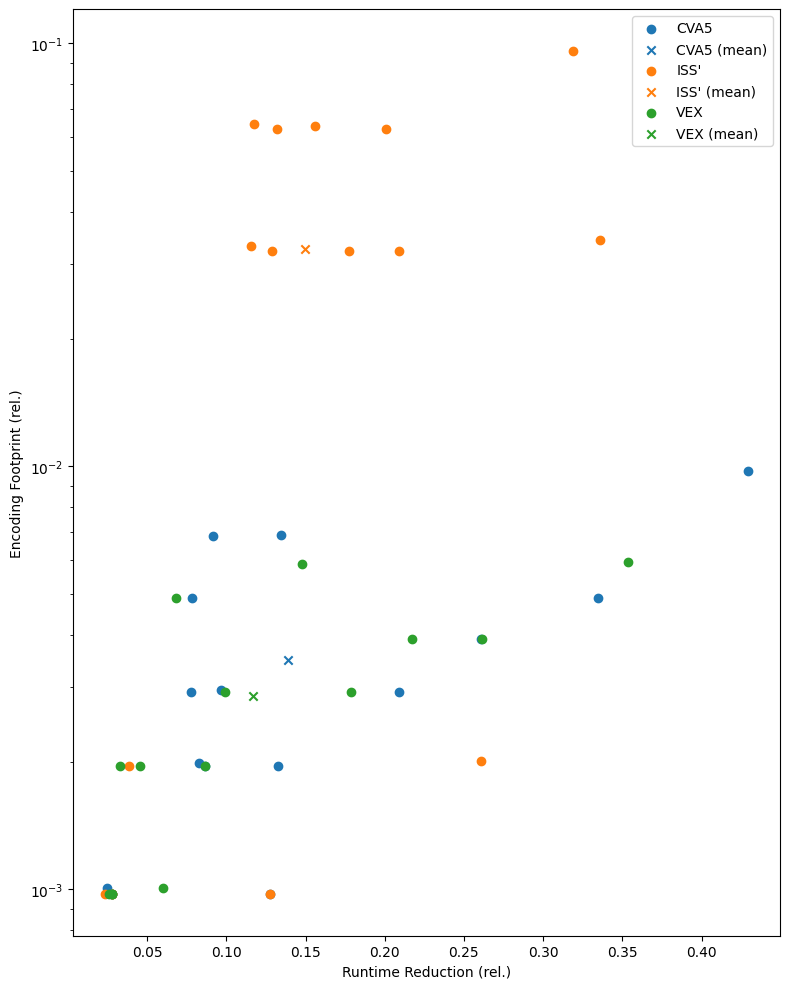

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10), tight_layout=True)
for group, group_df in df_full_temp.groupby(["Core"])[["rel_run_instrs_reduction", "enc_total_weight"]]:
    # print("group", group)
    config = group
    # print("group_df", group_df)
    # assert len(group_df) == 1
    x = group_df["rel_run_instrs_reduction"].values
    x_mean = group_df["rel_run_instrs_reduction"].mean()
    y = group_df["enc_total_weight"].values 
    y_mean = group_df["enc_total_weight"].mean()
    color=next(ax._get_lines.prop_cycler)["color"]
    # print("x,y", x, y)
    ax.scatter(x ,y, label=config, color=color)
    ax.scatter(x_mean ,y_mean, label=f"{config} (mean)", color=color, marker="x")
    ax.legend()
    ax.set_xlabel("Runtime Reduction (rel.)")
    ax.set_ylabel("Encoding Footprint (rel.)")
    ax.set_yscale('log', base=10)
fig.show()

In [52]:
for group, group_df in df_full_temp.groupby(["Core"])[["Benchmark", "rel_run_instrs_reduction", "enc_total_weight"]]:
    # print("group", group)
    config = group
    # print("group_df", group_df)
    # assert len(group_df) == 1
    # x = group_df["rel_run_instrs_reduction"].values
    x_mean = group_df["rel_run_instrs_reduction"].mean()
    # = group_df["enc_total_weight"].values 
    y_mean = group_df["enc_total_weight"].mean()
    print()
    print("Group:", group)
    for _, row in group_df.iterrows():
        if pd.isna(row["Benchmark"]):
            continue
        # print("row", row)
        print(row["Benchmark"] + " & " + str(row["rel_run_instrs_reduction"]) + " & " + str(row["enc_total_weight"] * 100) + "\\\\")
    print("AVG" + " & " + str(x_mean) + " & " + str(y_mean * 100) + "\\\\")
    


Group: CVA5
aha-mont64 & 0.08650348209107594 & 0.1953125\\
crc32 & 0.26076503359801473 & 0.390625\\
edn & 0.09682809815983495 & 0.2960205078125\\
huffbench & 0.02753900917762475 & 0.09765625\\
matmult-int & 0.12781985181233269 & 0.09765625\\
md5sum & 0.07755516710000543 & 0.29296875\\
nbody & 0.027729667980985417 & 0.09765625\\
nettle-aes & 0.3349561678365014 & 0.48828125\\
nettle-sha256 & 0.42925947347453597 & 0.9765625\\
picojpeg & 0.07857301321905319 & 0.48828125\\
primecount & 0.13290885585157164 & 0.1953125\\
qrduino & 0.13466676894134744 & 0.6866455078125\\
st & 0.08259422094589441 & 0.1983642578125\\
tarfind & 0.20876150606927124 & 0.29296875\\
ud & 0.0914925877147208 & 0.68359375\\
wikisort & 0.024568966738139575 & 0.1007080078125\\
AVG & 0.13890761691943185 & 0.348663330078125\\

Group: ISS'
aha-mont64 & 0.1155632456060468 & 3.3203125\\
crc32 & 0.26076503359801473 & 0.201416015625\\
edn & 0.20072427791244418 & 6.2530517578125\\
huffbench & 0.02753900917762475 & 0.09765625\\
m

In [26]:
# Genrate hw ovcerhead tex table
lookup_core = {
    "Config 0": "ISS",
    "Config 1": "ISS'",
    "Config 2": "CVA5",
    "Config 3": "VEX",
}

df_full_ = df_full.copy()


df_full_["Benchmark"] = df_full_["benchmark"].apply(lambda x: x.split("/", 1)[-1] if not pd.isna(x) else x)
df_full_["Core"] = df_full_["config"].apply(lambda x: lookup_core.get(x), "???")

# df_full_ = df_full_[df_full_["Core"] != "ISS'"]
df_full_ = df_full_[~df_full_["Core"].isin(["ISS", "ISS'"])]

# df_full_
print("\\toprule")
print(r"Benchmark & Core & \begin{tabular}[c]{@{}r@{}}ASIP Overhead\\(rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}FPGA Overhead\\(LUTs/FFs/DSPs)\end{tabular}\\")
for benchmark, benchmark_df in df_full_.groupby("Benchmark"):
    print("\\midrule")
    first = True
    num_rows = len(benchmark_df)
    for core, core_df in benchmark_df.groupby("Core", sort=False):
        bench_ = f"\\multirow{{{num_rows}}}{{*}}{{{benchmark}}}" if first else ""
        first = False
        assert len(core_df) == 1
        # core_df = core_df.fillna("-")
        asip_syn_default_area_total_overhead_rel = core_df["asip_syn_default_area_total_overhead_rel"].iloc[0]
        fpga_syn_default_luts_total_overhead = core_df["fpga_syn_default_luts_total_overhead"].iloc[0]
        fpga_syn_default_ffs_total_overhead = core_df["fpga_syn_default_ffs_total_overhead"].iloc[0]
        fpga_syn_default_dsps_total_overhead = core_df["fpga_syn_default_dsps_total_overhead"].iloc[0]
        print(f"{bench_} & {core} & ${asip_syn_default_area_total_overhead_rel*100:.1f}\\%$ & ${fpga_syn_default_luts_total_overhead:.0f}$ / ${fpga_syn_default_ffs_total_overhead:.0f}$ / ${fpga_syn_default_dsps_total_overhead:.0f}$ \\\\".replace("nan", "-"))
print("\\midrule")
first = True
num_rows = len(df_full_["Core"].unique())
for core, core_df in df_full_.groupby("Core", sort=False):
    benchmark = "\\textbf{AVG}"
    bench_ = f"\\multirow{{{num_rows}}}{{*}}{{{benchmark}}}" "" if first else ""
    first = False
    # assert len(core_df) == 1
    # core_df = core_df.fillna("-")
    asip_syn_default_area_total_overhead_rel = core_df["asip_syn_default_area_total_overhead_rel"].mean()
    fpga_syn_default_luts_total_overhead = core_df["fpga_syn_default_luts_total_overhead"].mean()
    fpga_syn_default_ffs_total_overhead = core_df["fpga_syn_default_ffs_total_overhead"].mean()
    fpga_syn_default_dsps_total_overhead = core_df["fpga_syn_default_dsps_total_overhead"].mean()
    print(f"{bench_} & {core} & ${asip_syn_default_area_total_overhead_rel*100:.1f}\\%$ & ${fpga_syn_default_luts_total_overhead:.0f}$ / ${fpga_syn_default_ffs_total_overhead:.0f}$ / ${fpga_syn_default_dsps_total_overhead:.0f}$ \\\\".replace("nan", "-"))
print("\\bottomrule ")

\toprule
Benchmark & Core & \begin{tabular}[c]{@{}r@{}}ASIP Overhead\\(rel.)\end{tabular} & \begin{tabular}[c]{@{}r@{}}FPGA Overhead\\(LUTs/FFs/DSPs)\end{tabular}\\
\midrule
\multirow{2}{*}{aha-mont64} & CVA5 & $-\%$ & $90$ / $110$ / $0$ \\
 & VEX & $1.6\%$ & $68$ / $8$ / $0$ \\
\midrule
\multirow{2}{*}{crc32} & CVA5 & $-\%$ & $332$ / $140$ / $3$ \\
 & VEX & $2.9\%$ & $138$ / $8$ / $0$ \\
\midrule
\multirow{2}{*}{edn} & CVA5 & $-\%$ & $405$ / $222$ / $9$ \\
 & VEX & $9.0\%$ & $171$ / $28$ / $3$ \\
\midrule
\multirow{2}{*}{huffbench} & CVA5 & $-\%$ & $91$ / $106$ / $0$ \\
 & VEX & $1.4\%$ & $67$ / $8$ / $0$ \\
\midrule
\multirow{1}{*}{matmult-int} & CVA5 & $-\%$ & $240$ / $133$ / $3$ \\
\midrule
\multirow{2}{*}{md5sum} & CVA5 & $-\%$ & $341$ / $185$ / $0$ \\
 & VEX & $1.5\%$ & $71$ / $8$ / $0$ \\
\midrule
\multirow{2}{*}{nbody} & CVA5 & $-\%$ & $88$ / $102$ / $0$ \\
 & VEX & $1.4\%$ & $125$ / $8$ / $0$ \\
\midrule
\multirow{2}{*}{nettle-aes} & CVA5 & $-\%$ & $360$ / $189$ / $0$ \\
 & VE